In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import sys

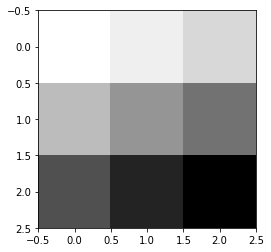

In [6]:
# 3*3*1 이미지 준비, 2*2*1 필터 준비
image = np.array([[[[1], [2], [3]],
                  [[4], [5], [6]],
                  [[7], [8], [9]]]], dtype=np.float32)

image.shape
plt.imshow(image.reshape(3, 3), cmap="Greys") # 숫자를 받아들여서 바로 이미지화 시켜줌 # BUT 이미지 2차원으로 넘겨줘야함

"""
아래 그래프의 정사각형 하나당 
    1  2  3
    4  5  6
    7  8  9     의 값이 들어가있음 

여기서 2*2 필터의 가중치값이 1이라면 '1*1 + 1*2 + 1*4 + 1*5 ' 로 계산
"""

shape: (1, 2, 2, 1)
축의 방향을 바꿈: [[[[12.]
   [16.]]

  [[24.]
   [28.]]]]
차원 변경: [[12. 16.]
 [24. 28.]]


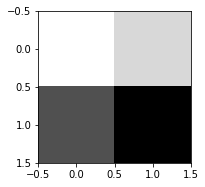

In [14]:
## padding 없이 convolution layer 추출

# filter 만들기
filter = tf.constant([[[[1.]], [[1.]]],
                     [[[1.]], [[1.]]]])
filter.shape


# CNN 
conv2d = tf.nn.conv2d(image, filter, strides=[1, 1, 1, 1], padding="VALID")
# 원본이미지, filter, stride(가로세로 한칸씩 이동한다) 가운데 두값이 실제값 양옆은 항상1
#  padding="VALID" : padding 없이


# 세션 만들어주기
sess = tf.Session()
conv2d_img = sess.run(conv2d)


# shape 확인
print("shape:", conv2d_img.shape) # 원본 이미지에 filter로 특징을 뽑아낸 이미지는 2*2 의 결과로 나타남


# 특징 뽑아내기
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
print("축의 방향을 바꿈:", conv2d_img)

for i, one_img in enumerate(conv2d_img):
    print("차원 변경:", one_img.reshape(2, 2))
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(2,2), cmap="Greys") # 차원 변경한 값의 형태로 그래프에 나타남
    
sess.close()

shape: (1, 3, 3, 1)
축의 방향을 바꿈: [[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]]
차원 변경: [[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


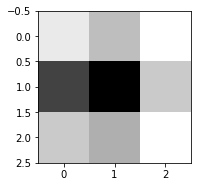

In [15]:
## padding을 이용한 convolution layer 추출

# filter 만들기
filter = tf.constant([[[[1.]], [[1.]]],
                     [[[1.]], [[1.]]]])
filter.shape


# CNN 
conv2d = tf.nn.conv2d(image, filter, strides=[1, 1, 1, 1], padding="SAME")
# padding="SAME" : 원본과 똑같은 크기로 패딩을 추가해주겠다
"""
    0  0  0  0  0
    0  1  2  3  0
    0  4  5  6  0
    0  7  8  9  0   으로 padding 채운 후 
    0  0  0  0  0

filter(2*2)는 padding으로 채운 부분까지 계산하여 convolution layer 추출한다
"""


# 세션 만들어주기
sess = tf.Session()
conv2d_img = sess.run(conv2d)


# shape 확인
print("shape:", conv2d_img.shape) # 원본 이미지에 filter로 특징을 뽑아낸 이미지는 2*2 의 결과로 나타남


# 특징 뽑아내기
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
print("축의 방향을 바꿈:", conv2d_img)

for i, one_img in enumerate(conv2d_img):
    print("차원 변경:", one_img.reshape(3, 3))
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(3,3), cmap="Greys") # 차원 변경한 값의 형태로 그래프에 나타남
    
sess.close()

shape: (1, 3, 3, 3)
축의 방향을 바꿈: [[[[ 12.]
   [ 16.]
   [  9.]]

  [[ 24.]
   [ 28.]
   [ 15.]]

  [[ 15.]
   [ 17.]
   [  9.]]]


 [[[120.]
   [160.]
   [ 90.]]

  [[240.]
   [280.]
   [150.]]

  [[150.]
   [170.]
   [ 90.]]]


 [[[-12.]
   [-16.]
   [ -9.]]

  [[-24.]
   [-28.]
   [-15.]]

  [[-15.]
   [-17.]
   [ -9.]]]]
차원 변경: [[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
차원 변경: [[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
차원 변경: [[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


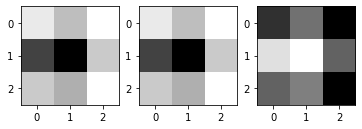

In [16]:
## 3개의 필터 사용(2*2*1*3)

# filter 만들기
filter = tf.constant([[[[1., 10, -1]], [[1., 10, -1]]],
                     [[[1., 10, -1]], [[1., 10, -1]]]])
filter.shape


# CNN 
conv2d = tf.nn.conv2d(image, filter, strides=[1, 1, 1, 1], padding="SAME")
# padding="SAME" : 원본과 똑같은 크기로 패딩을 추가해주겠다
"""
    0  0  0  0  0
    0  1  2  3  0
    0  4  5  6  0
    0  7  8  9  0   으로 padding 채운 후  
    0  0  0  0  0

filter(2*2)는 padding으로 채운 부분까지 계산하여 convolution layer 추출한다
"""



# 세션 만들어주기
sess = tf.Session()
conv2d_img = sess.run(conv2d)


# shape 확인
print("shape:", conv2d_img.shape) # 원본 이미지에 filter로 특징을 뽑아낸 이미지는 2*2 의 결과로 나타남


# 특징 뽑아내기
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
print("축의 방향을 바꿈:", conv2d_img)

for i, one_img in enumerate(conv2d_img):
    print("차원 변경:", one_img.reshape(3, 3))
    plt.subplot(1, 3, i+1)
    plt.imshow(one_img.reshape(3,3), cmap="Greys") # 차원 변경한 값의 형태로 그래프에 나타남
    
sess.close()

# 각각의 영역을 filter를 이용해서 추출해내기
#  따로따로 읽어들여서 나중에 한장의 이미지로 나타냄


In [20]:
## MaxPooling(2*2)

# filter 만들기

image2 = tf.constant([[[[4], [3]],
                      [[2], [1]]]])

# 최대값이 어떻게 추출되는지 알아보기
pool = tf.nn.max_pool(image2, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding="VALID") # 2*2짜리의 커널 크기 지정

# 세션
sess = tf.Session()

# 결과값
p = sess.run(pool)
print(p.shape)
print(p) # 1*1 이미지로 추출됨 # 가중치 값이 따로 필요없음 # 필터를 덮어놓은 위치에서 가장 큰값을 골라내면 됨 

sess.close()

(1, 1, 1, 1)
[[[[4]]]]


## MNIST를 이용한 CNN
Lab11-CNN.pdf 슬라이드 참고

In [2]:
# 데이터 준비
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


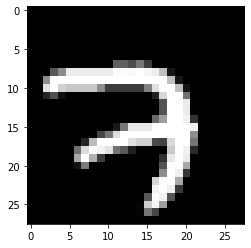

In [3]:
# 데이터 확인
img = mnist.train.images[0] # 첫번째 이미지 뽑아오기
img.shape # 한장불러오면 일차원배열

plt.imshow(img.reshape(28, 28), cmap="gray")

In [4]:
# 입력값 준비
X = tf.placeholder(tf.float32, shape=[None, 28*28])
y = tf.placeholder(tf.float32, shape=[None, 10])

In [5]:
# 첫 번째 Convolution Layer 준비
# 필터 : 크기 3*3, 개수 32, 색상수 1

X_img = tf.reshape(X, [-1, 28, 28, 1])
    # [-1, 28, 28, 1] : 사용할 개수, -1이면 개수 상관 없다는 뜻 / 가로 / 세로 / 색상수-> 4차원으로 맞춰줘야함
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
    # [3, 3, 1, 32] : 가로 / 세로 / 색상수 / 개수 # stddev=0.01 : 랜덤값의 범위 표준편차 범위 안에서 뽑아짐    

# 한번만 실행하도록 shell 따로 만들어서 준비하기

In [6]:
# Convolutional layer1(가중치 연산해서 뽑아냄)
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding="SAME")
print(L1) # convolutional layer 로 뽑았을때결과에 대한 크기 

# MAX Pooling 넣기전에 relu 에 통과시켜보기
L1 = tf.nn.relu(L1)
print(L1) # 분류값 알아내기

# Pooling layer1(큰 값 뽑아내기 때문에 따로 가중치값 뽑아낼 필요 없음)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
    # 입력할 이미지 / 필터 크기(가운데 있는 두개의 값이 실제값) / strides 몇칸씩 움직일것인지, 2칸씩 움직이게되면 좀 줄어들것 / padding 할거다
print(L1) # 14*14 이미지가 주어짐

Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)


In [7]:
# 두 번째 Convolution Layer 준비 - 특징 또 뽑기 / 중요한 특징을 더 뽑아내기
# 필터 : 크기 3*3, 개수 64, 색상수 1

# 데이터는 이미 있으니
# 필터만 준비
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
    # 1장의 이미지를 32조각(위에 maxpool결과값)으로 가져왔으니 32장으로 보기 이걸 다시 64개로 쪼개겠다

In [8]:
# Convolutional layer2
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding="SAME")
print(L2)

# MAX Pooling 넣기전에 relu 에 통과시켜보기
L2 = tf.nn.relu(L2)
print(L2) 

# Pooling layer1
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
print(L2) # 7*7 이미지로가 절반으로 줄어든것을 볼수있다 # 한장의 이미지를 64개로 쪼개놓은것

Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)


In [9]:
# Fully connected layer 작성(Dense Layer)
learning_rate = 0.001
training_epochs = 15
batch_size = 500

# tensor graph 작성
#---------------------

# 입력 데이터 준비
L2 = tf.reshape(L2, [-1, 7*7*64]) # 2차원으로 바꿔주기

W3 = tf.Variable(tf.random_normal([7*7*64, 10]))  # 크기 / 출력개수 10개 
b = tf.Variable(tf.random_normal([10]))

# 비율 계산
logit = tf.matmul(L2, W3) + b
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logit, labels=y))

# 최저 비용 구하기
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# tensor graph 실행
#-----------------------
sess = tf.Session()
sess.run(tf.global_variables_initializer())
    
for epoch in range(training_epochs):
    fetal_batch = int(mnist.train.num_examples/batch_size)
    avg_cost = 0
        
    for i in range(fetal_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, c = sess.run([train, cost], feed_dict={X:batch_xs, y:batch_ys})
        avg_cost += c/fetal_batch
            
    print("Epoch :", "%04d"%(epoch+1), "cost :", "{:.9f}".format(avg_cost))
    
print("훈련 종료")

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Epoch : 0001 cost : 0.738878985
Epoch : 0002 cost : 0.153591779
Epoch : 0003 cost : 0.106411161
Epoch : 0004 cost : 0.083966346
Epoch : 0005 cost : 0.070054032
Epoch : 0006 cost : 0.062735030
Epoch : 0007 cost : 0.054976204
Epoch : 0008 cost : 0.049074804
Epoch : 0009 cost : 0.044645795
Epoch : 0010 cost : 0.042102311
Epoch : 0011 cost : 0.037113254
Epoch : 0012 cost : 0.034654723
Epoch : 0013 cost : 0.032430345
Epoch : 0014 cost : 0.030715532
Epoch : 0015 cost : 0.027444974
훈련 종료


In [10]:
# 정확도 알아보기 

correct_predict = tf.equal(tf.argmax(logit, 1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_predict, tf.float32))
print("정확도 : ", sess.run(accuracy, feed_dict={X:mnist.test.images, y:mnist.test.labels}))
sess.close()

# 기본 성능 98%

정확도 :  0.9833


## 교통 표지판 인식

http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset

downloads - this link - GTSRB_Final_Test_GT.zip, GTSRB_Final_Test_Images.zip, GTSRB_Final_Training_Images.zip 3개 다운받기


이미지(32 * 32) -> Convolution Layer1 -> Max Pooling -> Convolution Layer2 -> Max Pooling -> FC

### 이미지 전처리

In [2]:
# 이미지 전처리를 위한 패키지
import glob # 파일 여러개 동시에 불러올 때
from skimage.color import rgb2lab # rgb색상을 흑백으로 바꿔줌
from skimage.transform import resize 
from collections import namedtuple

# 랜덤값 고정
np.random.seed(101)

In [3]:
# 필요한 상수 정의
N_CLASSES = 43               # 최종 출력개수
RESIZED_IMAGE = (32, 32)     # 사이즈

In [4]:
Dataset = namedtuple("Dataset", ["X", "y"]) # namedtuple : 수정불가 / 변수 안전하게 보관 가능

In [5]:
# 데이터 불러오기
def to_tf_format(imgs):
    return np.stack([img[:, :, np.newaxis] for img in imgs]).astype(np.float32) # 차원 늘려주기
        
## ppm형식 파일 불러오는 함수 : 쓰기좋은 형태로 전처리 다한 상태로 파일 불러오도록 함수 작성하기 
def read_dataset_ppm(rootpath, n_labels, resize_to):
    images = []
    labels = []
    
    # 사진 파일 불러오기
    for c in range(n_labels): # Final_Training - Images 폴더 개수 43개 이므로 n_labels = 43
        full_path = rootpath + "/" + format(c, "05d") + "/"
            # 폴더명을 어떻게 지정해주냐에 따라 파일불러오는 방식의 여부가 달라짐 # 이거는 5자리 숫자여서 불러오기 편하다~~
        
        # 이미지 숫자로 바꿔주기 
        for img_name in glob.glob(full_path + "*.ppm") :
            img = plt.imread(img_name).astype(np.float32)
                # imshow( 숫자를 이미지로 ) imread(이미지를 숫자로 바꿔주는애)
            
            # img rgb색상에서 lab 색상으로 변환 
            img = rgb2lab(img/255.0)[:, :, 0]
                # rgb는 255개씩이므로 255로 나눠줌 # [:, :, 0] 3차원으로만들어주기
            
            # 크기 맞춰주기
            if resize_to:
                img = resize(img, resize_to)
                    # resize ; 이미지 사이즈 한번에 줄여주기
                    
            # labeling(one-hot) : 교통표지판의 답을 뭐라고 할 것인가
            # one hot encoding 한곳에만 값 주어주기 ex) 세번째 사진이면 0 0 1 0 0 0 0 0 0 0 .....
            label = np.zeros((n_labels), dtype=np.float32)
            label[c] = 1.0
            
            images.append(img.astype(np.float32))
            labels.append(label)
            
    return Dataset(X=to_tf_format(images), y=np.matrix(labels).astype(np.float32))
            # 위에 namedtuple로 만들어놓은거 # 미리 2차원으로 담아서 넣어두기

In [6]:
# 데이터 보기
dataset = read_dataset_ppm("data/traffic/GTSRB/Final_Training/Images", N_CLASSES, RESIZED_IMAGE)
    # 상위폴더(Images) 까지 지정해주면 그 안에있는 모든 폴더와 파일 가져옴
# print(dataset.X.shape) # (39209, 32, 32, 1)  # 32*32에 색상 1 
# print(dataset.y.shape) # (39209, 43)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


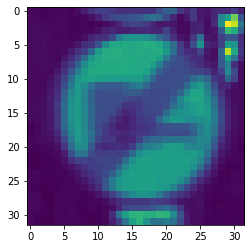

In [7]:
# 확인하기

# one hot 레이블 확인
## 첫번째 폴더의 첫번째 이미지
print(dataset.y[0, :]) # 첫번째 데이터이니까 첫번째에만 1써져있고 나머지는 다 0~~~~~~~~~
plt.imshow(dataset.X[0, :, :, :].reshape(RESIZED_IMAGE))

## 마지막 폴더의 마지막 이미지
print(dataset.y[-1, :])
plt.imshow(dataset.X[-1, :, :, :].reshape(RESIZED_IMAGE))

In [7]:
# 훈련용 데이터와 테스트용 데이터 분리
from sklearn.model_selection import train_test_split

idx_train, idx_test = train_test_split(range(dataset.X.shape[0]), test_size=0.25, random_state=101) 
                       # 데이터 차원이 다르므로 따로 받아옴
                                       
X_train = dataset.X[idx_train, :, :, :]
X_test = dataset.X[idx_test, :, :, :]
y_train = dataset.y[idx_train, :]
y_test = dataset.y[idx_test, :]
                                       
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29406, 32, 32, 1)
(9803, 32, 32, 1)
(29406, 43)
(9803, 43)


### 모델 훈련과 예측

In [8]:
def minibatcher(X, y, batch_size, shuffle):
    assert X.shape[0] == y.shape[0] # (test주도 개발방식에 맞는 코드)assert : 디버깅 모드 / 릴리즈 모드일때는 작동을 안함
    n_samples = X.shape[0]
    
    if shuffle:
        idx = np.random.permutation(n_samples) # 29406개 sample을 섞어서 순서를 세워둠
    else :
        idx = list(range(n_samples))
        
    for k in range(int(np.ceil(n_samples/batch_size))):
        from_idx = k * batch_size
        to_idx = (k+1) * batch_size
        yield X[idx[from_idx:to_idx], :, :, :], y[idx[from_idx:to_idx], :]        
        # yield 일종의 스레드 기법; 안정적으로 작업이 진행되게 하게끔 하기위한 하나의 방법 
        # (현재 데이터를 하나씩 끌어오고 있음. 이것을 좀더 안정적으로 처리 ?>?)

In [9]:
for mb in minibatcher(X_train, y_train, 10000, True):# 10000개씩 끊어서 실행
    print(mb[0].shape, mb[1].shape)

(10000, 32, 32, 1) (10000, 43)
(10000, 32, 32, 1) (10000, 43)
(9406, 32, 32, 1) (9406, 43)


### FC Layer

In [10]:
def fc_no_activation_layer(in_tensors, n_units) :
    W = tf.get_variable("fc_W", [in_tensors.get_shape()[1], n_units], 
                        tf.float32, tf.contrib.layers.xavier_initializer()) # xavier 쓸거라서 get_variable사용함 
    b = tf.get_variable("fc_b", [n_units], tf.float32, tf.constant_initializer(0.0))
    
    return tf.matmul(in_tensors, W) + b

def fc_layer(in_tensors, n_units) :
    return tf.nn.leaky_relu(fc_no_activation_layer(in_tensors, n_units)) # leaky_relu : 최소값을 음수까지 쓸수있도록

### Convolution Layer

       convolution layer -> relu -> max pooling -> drop out

In [11]:
def conv_layer(in_tensors, kernel_size, n_units):
    W = tf.get_variable("conv_W", [kernel_size, kernel_size, in_tensors.get_shape()[3], n_units],
                        tf.float32, tf.contrib.layers.xavier_initializer())
    b = tf.get_variable("conv_b", [n_units], tf.float32, tf.constant_initializer(0.0))
    return tf.nn.leaky_relu(tf.nn.conv2d(in_tensors, W, [1, 1, 1, 1], "SAME")) # [1, 1, 1, 1] : stride 한칸씩 이동, padding="SAME"

def maxpool_layer(in_tensors, sampling): # sampling : 필터사이즈
    return tf.nn.max_pool(in_tensors, ksize=[1, sampling, sampling, 1], strides=[1, sampling, sampling, 1], padding="SAME")
#                                      필터사이즈랑 스트라이드 사이즈 똑같이 하겠다

def dropout(in_tensors, keep_proba, is_training):
    return tf.cond(is_training, lambda:tf.nn.dropout(in_tensors, keep_proba), lambda:in_tensors) 
 # true면 훈련중, false면 test중 / lambda 쓰는 이유가 뭐라구용.....? 조건주는거..?
 # lambda:tf.nn.dropout(in_tensors, keep_proba) : True면 dropout 하고 몇 %만 남기고 나머지는 끊어 버려라
 # lambda:in_tensors : False면 dropout 안하고 그냥in_tensors값

#### summary

    - convolution 1st : 5*5, 32 필터
    - convolution 2nd : 5*5, 64 필터
    - FC(fully connected) : 1024 unit(출력개수 1024개로 연결)
    - Dropout : 총 40% (40% 버리고 60% 훈련)(첫번째 20%, 두번째 20% 총 40%)
    - Activation Function : Softmax

In [12]:
# 모델 구성
def model(in_tensors, is_training):
    
    # 1st conv layer : 5*5, 32 filter, 2x maxpool, 20% drop out
    with tf.variable_scope("L1"):
        l1 = maxpool_layer(conv_layer(in_tensors, 5, 32), 2)
         # 입력데이터, 필터크기, 출력개수(layer unit의 개수, filter 개수) # 출력값이 maxpool에게는 입력값이므로 전체 넣어주기, maxpool 개수 2
        l1_out = dropout(l1, 0.8, is_training) 
         # 입력값, 남기는거(20% 버릴거니까 남기는건 80%), 출력값인가?ㅋㅋㅋㅋ
    
    
    # 2nd conv layer : 5*5, 64 filter, 2x maxpool, 20% drop out
    with tf.variable_scope("L2"):
        l2 = maxpool_layer(conv_layer(l1_out, 5, 64), 2)
        l2_out = dropout(l2, 0.8, is_training)   
    
    
    # 평면화(1차원으로 평면화)
    # 전처리 끝나고 나서 FC로 넘길때 차원(4차원 안되니까 2차원으로) 풀어서 넘겨줌 
    # FC에게 값을 부드럽게 넘겨주기 위해서 값을 1차원으로 풀어서 넘겨줌
    # 그럼 FC 에서 개수 정할때 자연스럽게 차원하나 높여주게 됨 그래서 2차원되니까 걍 1차원으로 풀어주라고오오오오오오오옹놀오란올
    with tf.variable_scope("flatten"):
        l2_out_flat = tf.layers.flatten(l2_out) # flatten : 다차원으로 1차원으로 펼쳐주는 함수 
    
    
    # FC : 1024 neurons, 40% dropout
    with tf.variable_scope("L3"):
        l3 = fc_layer(l2_out_flat, 1024)
        l3_out = dropout(l3, 0.6, is_training)
    
    
    # output
    with tf.variable_scope("out"):
        out_tensors = fc_no_activation_layer(l3_out, N_CLASSES) # 최종출력개수 실제 출력의 개수(N_CLASSES) 지정해줘야함 
        
    return out_tensors

In [14]:
# 실제로 사용할(최종적으로) 함수 : 얘만 호출하면 그동안 만들었던 모든 함수 실행되도록 하자 

from sklearn.metrics import classification_report, confusion_matrix


def train_model(X_train, y_train, X_test, y_test, learning_rate, max_epochs, batch_size):
    
    in_X_tensors_batch = tf.placeholder(tf.float32, shape=(None, RESIZED_IMAGE[0], RESIZED_IMAGE[1], 1)) 
                                                                # 크기도 되도록이면 변수로 지정하자 / shape 색상수 1
    in_y_tensors_batch = tf.placeholder(tf.float32, shape = (None, N_CLASSES)) # N_CLASSES : 최종 가중치에 대한 결과값
    is_training = tf.placeholder(tf.bool) # TRUE FALSE 중 하나만 들어가면 되니 bool 사용
    
    logit = model(in_X_tensors_batch, is_training) # model함수에서 만들은 최종결과 받아올수있음
    out_y_pred = tf.nn.softmax(logit) # 결과에 대한 예측값
    loss_score = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels = in_y_tensors_batch)
    loss = tf.reduce_mean(loss_score) # 비용
    train = tf.train.AdamOptimizer(learning_rate).minimize(loss)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    
    for epochs in range(max_epochs):
        print("Epoch : ", epochs)
        tf_score = []
        
        for mb in minibatcher(X_train, y_train, batch_size, True):
            tf_output = sess.run([train, loss], feed_dict = {in_X_tensors_batch:mb[0], 
                                                 in_y_tensors_batch:mb[1],
                                                 is_training:True}) # tf_output : 변수 하나로 쓰면 list로 값 전달되요...
            tf_score.append(tf_output[1])
            
        print("     training_loss_score = ", np.mean(tf_score))        
        
    
    # Test
    print("TEST SET PERFORMANCE")
    y_test_pred, test_loss = sess.run([out_y_pred, loss], feed_dict = {in_X_tensors_batch:X_test, 
                                                 in_y_tensors_batch:y_test,
                                                 is_training:False})
    
    print("test_loss_score", test_loss)
    y_test_pred_classified = np.argmax(y_test_pred, axis=1).astype(np.int32)
    y_test_true_classified = np.argmax(y_test, axis=1).astype(np.int32)
    print(classification_report(y_test_true_classified, y_test_pred_classified))
    
    ## 
    cm = confusion_matrix(y_test_true_classified, y_test_pred_classified)

    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.colorbar()
    plt.tight_layout()

    plt.imshow(np.log2(cm+1), interpolation="nearest", cmap=plt.get_cmap("tab20"))
    plt.colorbar()
    plt.tight_layout()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Epoch :  0
     training_loss_score =  4.52819
Epoch :  1
     training_loss_score =  0.7159366
Epoch :  2
     training_loss_score =  0.36047843
Epoch :  3
     training_loss_score =  0.22782047
Epoch :  4
     training_loss_score =  0.16415915
Epoch :  5
     training_loss_score =  0.12713024
Epoch :  6
     training_loss_score =  0.108850084
Epoch :  7
     training_loss_score =  0.0

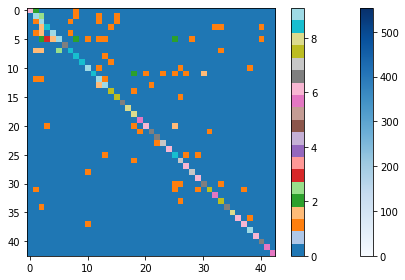

In [15]:
tf.reset_default_graph()

train_model(X_train, y_train, X_test, y_test, 0.001, 10, 256) 
    # learning_rate = 0.001 / epoch 데이터의 반복횟수 10 / 256개로 나누기